In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv
/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv


Installing NLTK package 

In [4]:
!pip  install nltk

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Downloading stopwords

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Importing packages

In [7]:
import numpy as np 
import pandas as pd 
import re
import nltk
import requests
import zipfile
import os
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Reading the datasets

In [8]:
# Defining the file paths
true_news_path = '/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv'
fake_news_path = '/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv'

# Reading the datasets
true_news_df = pd.read_csv(true_news_path)
fake_news_df = pd.read_csv(fake_news_path)

Printing the datasets

In [9]:
# Printing the contents of the True news dataset
print("True News Dataset:")
true_news_df.head()  # Printing the first 5 rows

True News Dataset:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
# Printing the contents of the Fake news dataset
print("\nFake News Dataset:")
fake_news_df.head()  # Printing the first 5 rows


Fake News Dataset:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Combining two datasets and creating a new one, labelling the true news as "1" and fake news as "0"

In [11]:
# combining datasets
true_news_df['label'] = 1  # Label for true news
fake_news_df['label'] = 0   # Label for fake news
combined_df = pd.concat([true_news_df, fake_news_df], ignore_index=True)

Printing a sample of combined dataset

In [12]:
combined_df.sample(5)

,title,text,subject,date,label
19886,Zimbabwe opposition chief Tsvangirai suddenly ...,HARARE (Reuters) - Zimbabwe opposition leader ...,worldnews,"September 16, 2017",1
34189,BREAKING WIKILEAKS: Hillary Admits U.S. Can’t ...,PLEASE NOTE THE OVERWHELMING INFORMATION REGAR...,politics,"Oct 10, 2016",0
20662,Sweeping change in China's military points to ...,BEIJING (Reuters) - China s military is prepar...,worldnews,"September 8, 2017",1
30515,AMERICAN WORKERS Scr@wed Over By Outsourcing J...,American workers have suffered tremendously wi...,politics,"Dec 29, 2017",0
27410,Sources: President Obama Set To Make Official...,As the Democratic Primary wraps up with Hill...,News,"June 6, 2016",0


Preprocessing the datasets text column by Removing stopwords, punctuation, special characters, and unwanted symbols and creating new cleaned_text column to save cleaned text

In [13]:
# Defining a function to clean the text
def clean_text(text):
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Applying the cleaning function to the 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

Printing the first row on cleaned_text columns after text preprocessing

In [14]:
combined_df['cleaned_text'][0]

'washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republicans us representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases nondefense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending 7 percent meadows chairman small influential house freedom caucus said program democrats saying 

Tokenization: Tokenize the text and convert it into sequences suitable for embedding layers.

In [15]:
# Initializing the tokenizer
max_vocab_size = 10000
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(combined_df['cleaned_text'])

# Converting texts to sequences
sequences = tokenizer.texts_to_sequences(combined_df['cleaned_text'])

# Pading the sequences to ensure uniform input length
max_sequence_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Extracting labels
labels = combined_df['label'].values

Printing the labels

In [16]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
combined_df.head()

,title,text,subject,date,label,cleaned_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattlewashington reuters president donald tru...


Dataset Splitting: Split the dataset into training, validation, and test sets for proper model
evaluation.

In [18]:
# Splitting into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check dataset sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 31428
Validation set size: 6735
Test set size: 6735


**Pretrained Embeddings**

Import and Download Pretrained Embeddings

In [16]:
!pip install gensim

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [19]:
# Word2Vec
word2vec_model = api.load("word2vec-google-news-300")
print("Word2Vec model downloaded.")

Word2Vec model downloaded.


In [28]:
# FastText
fasttext_model = api.load("fasttext-wiki-news-subwords-300")
print("FastText model downloaded.")

FastText model downloaded.


In [29]:
# GloVe
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"

In [30]:
# Downloading GloVe embeddings
response = requests.get(glove_url)
with open(glove_zip_path, 'wb') as f:
    f.write(response.content)
print("GloVe embeddings downloaded.")

GloVe embeddings downloaded.


In [31]:
# Unzipping the downloaded file
with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
    zip_ref.extractall()
print("GloVe embeddings extracted.")

GloVe embeddings extracted.


In [32]:
# Cleaning up the zip file
os.remove(glove_zip_path)

In [33]:
# Loading GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Loading GloVe embeddings (100d)
glove_embeddings = load_glove_embeddings('/kaggle/working/glove.6B.100d.txt')

In [36]:
# Importing the KeyedVectors class directly
from gensim.models import KeyedVectors

def create_embedding_matrix(embeddings, tokenizer):
    # Checking if the embeddings object is a KeyedVectors instance
    if isinstance(embeddings, KeyedVectors):
        embedding_dim = embeddings.vector_size  # Geting embedding dimension
        embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
        for word, i in tokenizer.word_index.items():
            if word in embeddings:  # Checking if word is in vocabulary
                embedding_matrix[i] = embeddings[word]
    else:  
        embedding_dim = len(next(iter(embeddings.values())))  
        embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
        for word, i in tokenizer.word_index.items():
            if word in embeddings:
                embedding_matrix[i] = embeddings[word]

    return embedding_matrix

In [65]:
def create_embedding_matrix(embeddings, tokenizer):
    # Checking if the embeddings object is a KeyedVectors instance
    if isinstance(embeddings, KeyedVectors):
        embedding_dim = embeddings.vector_size  # Geting embedding dimension
        embedding_matrix2 = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
        for word, i in tokenizer.word_index.items():
            if word in embeddings:  # Checking if word is in vocabulary
                embedding_matrix2[i] = embeddings[word]
    # Checking if the embeddings object is a numpy array
    elif isinstance(embeddings, np.ndarray):
        embedding_dim = embeddings.shape[1]  # Geting embedding dimension from the array shape
        embedding_matrix2 = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
        # Here, we assume the embeddings are aligned with tokenizer.word_index 
        # i.e., embeddings[i] corresponds to the word with index i in tokenizer.word_index
        for word, i in tokenizer.word_index.items():
            if i < embeddings.shape[0]: # Make sure we don't go out of bounds
                embedding_matrix2[i] = embeddings[i]  
    else:  # Assume it's a dictionary-like object
        embedding_dim = len(next(iter(embeddings.values())))  
        embedding_matrix2 = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
        for word, i in tokenizer.word_index.items():
            if word in embeddings:
                embedding_matrix2[i] = embeddings[word]

    return embedding_matrix2

In [37]:
# Creating embedding matrices
word2vec_matrix = create_embedding_matrix(word2vec_model, tokenizer) 
fasttext_matrix = create_embedding_matrix(fasttext_model, tokenizer) 
glove_matrix = create_embedding_matrix(glove_embeddings, tokenizer)

Custom-Trained Embeddings: Train embeddings on your dataset

In [38]:
from gensim.models import Word2Vec 

# Custom-Trained Embeddings

# Training Word2Vec
custom_word2vec_model = Word2Vec(sentences=combined_df['cleaned_text'].apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)

In [39]:
# Training FastText
from gensim.models import FastText # Import the FastText class
custom_fasttext_model = FastText(sentences=combined_df['cleaned_text'].apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)

In [40]:
!pip install glove-python3

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 6.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for glove-python3: filename=glove_python3-0.1.0-cp310-cp310-linux_x86_64.whl size=1064158 sha256=35f202f043755ff4e5bce1432fcea5cf75e80eee552af1851869ed7e43f867b6
  Stored in directory: /root/.cache/pip/wheels/fe/2f/79/34314d44a0907e90e323c8c182ec23f126eb460829e02d98cf
Successfully built glove-python3


In [41]:
# Training GloVe
from glove import Corpus, Glove # Importing Corpus and Glove from glove
corpus = Corpus()
corpus.fit(combined_df['cleaned_text'].apply(lambda x: x.split()), window=5)
custom_glove_model = Glove(no_components=100, learning_rate=0.05)
custom_glove_model.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
custom_glove_model.add_dictionary(corpus.dictionary)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [42]:
# Saving the Custom-Trained Embeddings
custom_word2vec_model.save("custom_word2vec.model")
custom_fasttext_model.save("custom_fasttext.model")
custom_glove_model.save("custom_glove.model")

In [43]:
# Comparison
# Define a simple model to evaluate embeddings
def create_model(embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
# Evaluate Pretrained Embeddings
pretrained_models = {
    "Word2Vec": create_model(word2vec_matrix),
    "FastText": create_model(fasttext_matrix),
    "GloVe": create_model(glove_matrix)
}

for name, model in pretrained_models.items():
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"{name} Pretrained Model - Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8647 - loss: 0.3301 - val_accuracy: 0.9764 - val_loss: 0.1226
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9797 - loss: 0.0986 - val_accuracy: 0.9859 - val_loss: 0.0543
Epoch 3/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7477 - loss: 0.4446 - val_accuracy: 0.7706 - val_loss: 0.4424
Epoch 4/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9444 - loss: 0.1759 - val_accuracy: 0.9736 - val_loss: 0.1247
Epoch 5/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9626 - loss: 0.1646 - val_accuracy: 0.9687 - val_loss: 0.1365
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9660 - loss: 0.1469
Word2Vec Pretrained Model - Loss: 0.1478920876979828, Accuracy: 0.9657015800476074
Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6910 - loss: 0.5340 - val_accuracy: 0.5759 - val_loss: 0.6914
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6

Loss and accuracy of Pretrained embedding techniques on datasets

In [2]:
import pandas as pd

# Data
data = {
    "Model": ["Word2Vec Pretrained Model", "FastText Pretrained Model", "GloVe Pretrained Model"],
    "Loss": [0.1478920876979828, 0.030317651107907295, 0.032429348677396774],
    "Accuracy": [0.9657015800476074, 0.992724597454071, 0.994803249835968]
}

# Create DataFrame
df = pd.DataFrame(data)

df

,Model,Loss,Accuracy
0,Word2Vec Pretrained Model,0.147892,0.965702
1,FastText Pretrained Model,0.030318,0.992725
2,GloVe Pretrained Model,0.032429,0.994803


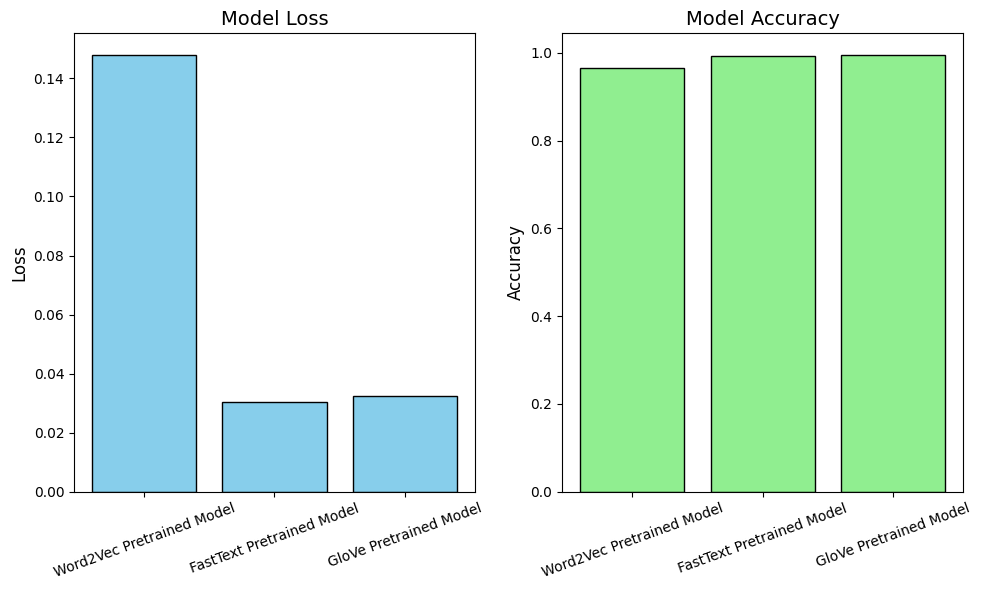

In [3]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.bar(df['Model'], df['Loss'], color='skyblue', edgecolor='black')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xticks(rotation=20, fontsize=10)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(df['Model'], df['Accuracy'], color='lightgreen', edgecolor='black')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=20, fontsize=10)

plt.tight_layout()
plt.show()

In [47]:
# Evaluate Custom-Trained Embeddings
custom_models = {
    "Custom Word2Vec": create_model(create_embedding_matrix(custom_word2vec_model.wv.vectors, tokenizer)),
    "Custom FastText": create_model(create_embedding_matrix(custom_fasttext_model.wv.vectors, tokenizer)),
    "Custom GloVe": create_model(create_embedding_matrix(custom_glove_model.word_vectors, tokenizer))
}

for name, model in custom_models.items():
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"{name} Custom-Trained Model - Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7454 - loss: 0.4656 - val_accuracy: 0.9477 - val_loss: 0.1917
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9610 - loss: 0.1546 - val_accuracy: 0.9844 - val_loss: 0.0797
Epoch 3/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9876 - loss: 0.0673 - val_accuracy: 0.9837 - val_loss: 0.0790
Epoch 4/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9839 - loss: 0.0798 - val_accuracy: 0.9872 - val_loss: 0.0641
Epoch 5/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9288 - loss: 0.1577 - val_accuracy: 0.9883 - val_loss: 0.0585
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9863 - loss: 0.0685
Custom Word2Vec Custom-Trained Model - Loss: 0.061182450503110886, Accuracy: 0.9878247976303101
Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7957 - loss: 0.4253 - val_accuracy: 0.9960 - val_loss: 0.0225
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - 

Loss and accuracy of Custom trained embedding techniques on dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Model": [
        "Custom Word2Vec Custom-Trained Model",
        "Custom FastText Custom-Trained Model",
        "Custom GloVe Custom-Trained Model"
    ],
    "Loss": [0.061182450503110886, 0.0189126655459404, 0.2650681138038635],
    "Accuracy": [0.9878247976303101, 0.9973273873329163, 0.9223459362983704]
}

# Create DataFrame
df = pd.DataFrame(data)

df

,Model,Loss,Accuracy
0,Custom Word2Vec Custom-Trained Model,0.061182,0.987825
1,Custom FastText Custom-Trained Model,0.018913,0.997327
2,Custom GloVe Custom-Trained Model,0.265068,0.922346


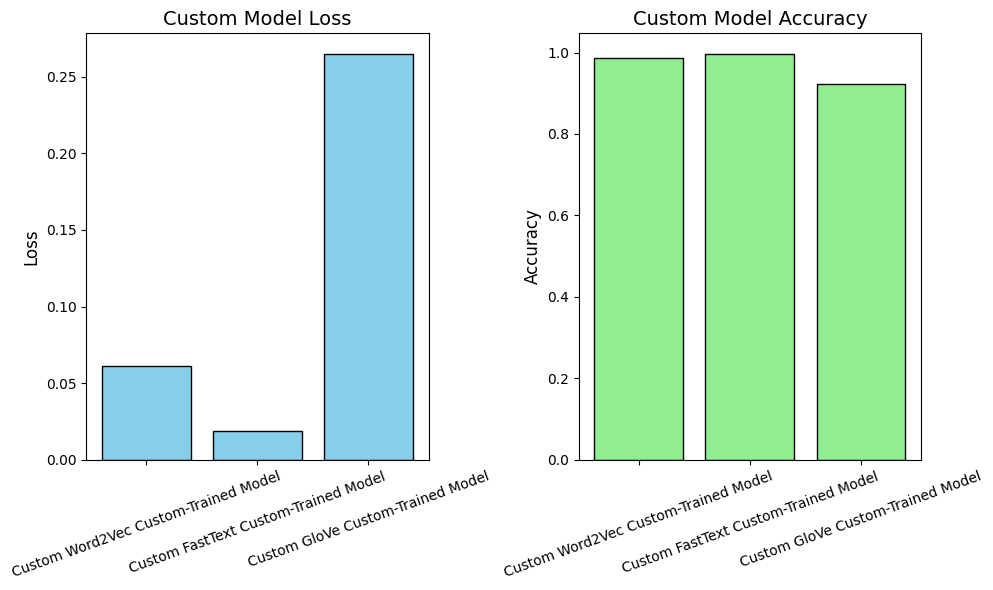

In [5]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.bar(df['Model'], df['Loss'], color='skyblue', edgecolor='black')
plt.title('Custom Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xticks(rotation=20, fontsize=10)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(df['Model'], df['Accuracy'], color='lightgreen', edgecolor='black')
plt.title('Custom Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=20, fontsize=10)

plt.tight_layout()
plt.show()

Task 3: Model Implementation

LSTM (Long Short-Term Memory)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Defining a model for LSTM
def create_lstm_model(embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                        output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix],
                        trainable=False))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [73]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 100)            │      22,744,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,227,005 (88.60 MB)

 Trainable params: 160,901 (628.52 KB)

 Non-trainable params: 22,744,300 (86.76 MB)

 Optimizer params: 321,804 (1.23 MB)

In [74]:
# Train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, name):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=5,
        batch_size=32,
        verbose=1
    )
    
    # Evaluate on test data
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name} Model Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return history, accuracy, precision, recall, f1

In [75]:
# Train models with pretrained embeddings
results = {}
pretrained_models = {
    "Word2Vec": create_lstm_model(word2vec_matrix),
    "FastText": create_lstm_model(fasttext_matrix),
    "GloVe": create_lstm_model(glove_matrix)
}

In [76]:
for name, model in pretrained_models.items():
    print(f"\nTraining {name} Model...")
    history, acc, prec, rec, f1 = train_and_evaluate_model(
        model, X_train, y_train, X_val, y_val, X_test, y_test, name)
    results[name] = {
        "History": history,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }


Training Word2Vec Model...
Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5783 - loss: 0.6711 - val_accuracy: 0.5494 - val_loss: 0.6888
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5339 - loss: 0.6903 - val_accuracy: 0.5485 - val_loss: 0.6922
Epoch 3/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6612 - loss: 0.6018 - val_accuracy: 0.9341 - val_loss: 0.2502
Epoch 4/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8479 - loss: 0.3477 - val_accuracy: 0.9908 - val_loss: 0.0485
Epoch 5/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9850 - loss: 0.0778 - val_accuracy: 0.9863 - val_loss: 0.0659
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Word2Vec Model Metrics:
Accuracy: 0.9849
Precision: 0.9981
Recall: 0.9701
F1-Score: 0.9839

Training FastText Model...
Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6638 - loss: 0.5803 - val_accuracy: 0.9255 - val_loss: 0.3990
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━

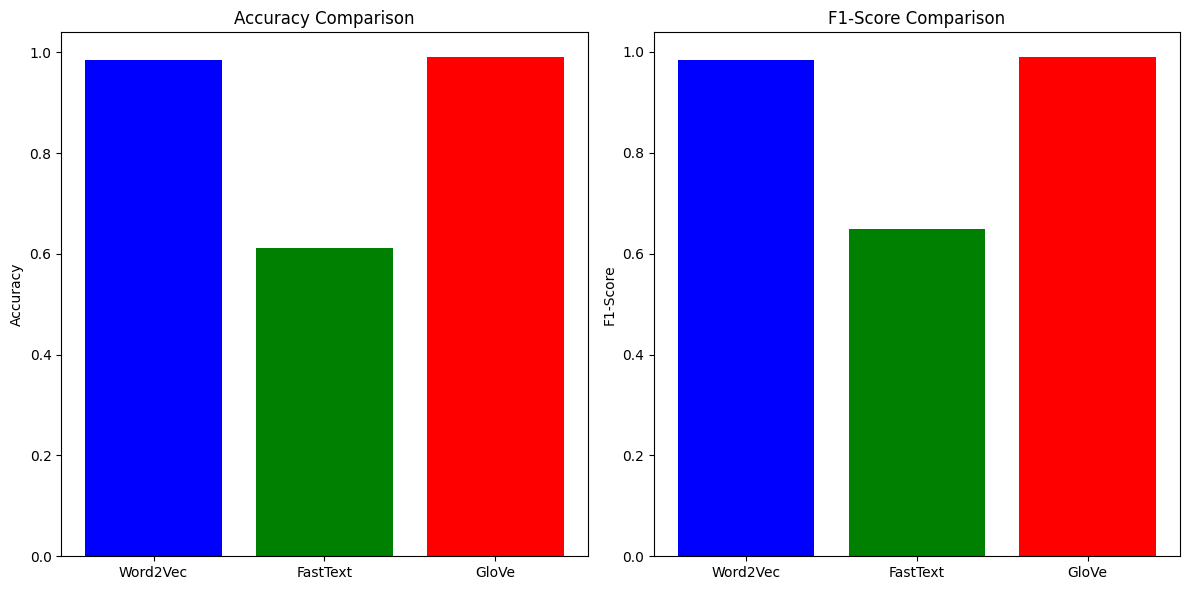

In [77]:
# Plot comparison
def plot_metrics(results):
    names = list(results.keys())
    accuracies = [results[name]['Accuracy'] for name in names]
    precisions = [results[name]['Precision'] for name in names]
    recalls = [results[name]['Recall'] for name in names]
    f1_scores = [results[name]['F1-Score'] for name in names]

    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.bar(names, accuracies, color=['blue', 'green', 'red'])
    plt.title("Accuracy Comparison")
    plt.ylabel("Accuracy")

    # F1-Score
    plt.subplot(1, 2, 2)
    plt.bar(names, f1_scores, color=['blue', 'green', 'red'])
    plt.title("F1-Score Comparison")
    plt.ylabel("F1-Score")

    plt.tight_layout()
    plt.show()

plot_metrics(results)

GRU (Gated Recurrent Units)

In [78]:
from keras.layers import GRU

# Step 3.1: Define a model with GRU to evaluate embeddings
def create_gru_model(embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        trainable=False))
    model.add(GRU(100, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(100))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [79]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ (None, 100, 100)            │      22,744,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,227,005 (88.60 MB)

 Trainable params: 160,901 (628.52 KB)

 Non-trainable params: 22,744,300 (86.76 MB)

 Optimizer params: 321,804 (1.23 MB)

In [80]:
# Evaluate Pretrained Embeddings with GRU
pretrained_gru_models = {
    "Word2Vec": create_gru_model(word2vec_matrix),
    "FastText": create_gru_model(fasttext_matrix),
    "GloVe": create_gru_model(glove_matrix)
}

In [81]:
# Training and evaluation
gru_results = {}
for name, model in pretrained_gru_models.items():
    print(f"Training GRU model with {name} embeddings...")
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"{name} Pretrained GRU Model - Loss: {loss}, Accuracy: {accuracy}")
    gru_results[name] = {
        "history": history,
        "loss": loss,
        "accuracy": accuracy
    }


Training GRU model with Word2Vec embeddings...
Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6000 - loss: 0.6615 - val_accuracy: 0.7739 - val_loss: 0.4871
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9772 - loss: 0.0805 - val_accuracy: 0.9961 - val_loss: 0.0190
Epoch 3/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9978 - loss: 0.0134 - val_accuracy: 0.9976 - val_loss: 0.0159
Epoch 4/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9981 - loss: 0.0123 - val_accuracy: 0.9976 - val_loss: 0.0150
Epoch 5/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9981 - loss: 0.0114 - val_accuracy: 0.9978 - val_loss: 0.0170
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0181
Word2Vec Pretrained GRU Model - Loss: 0.018314797431230545, Accuracy: 0.9971789121627808
Training GRU model with FastText embeddings...
Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7908 - loss: 0.4545 - val_accu

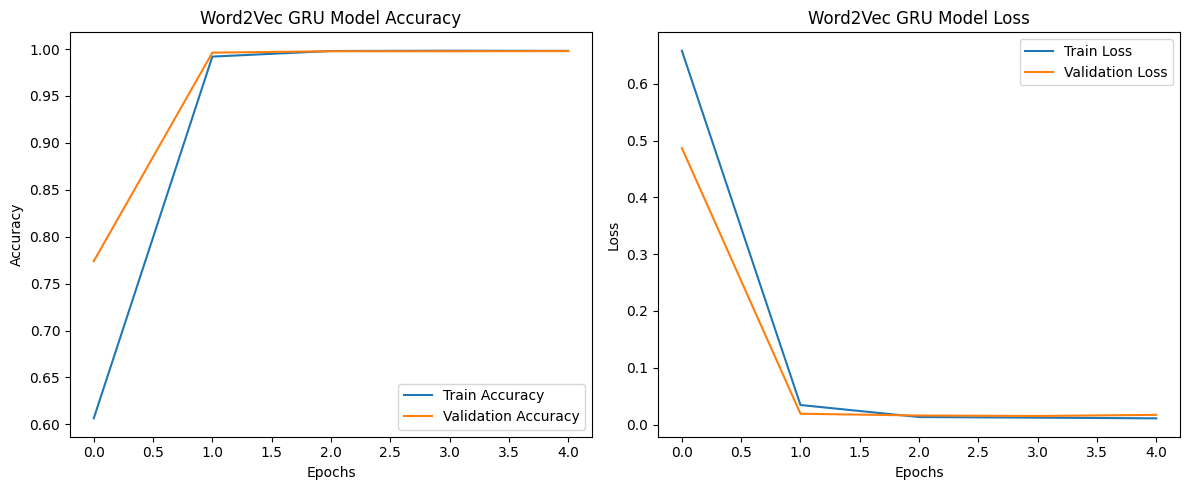

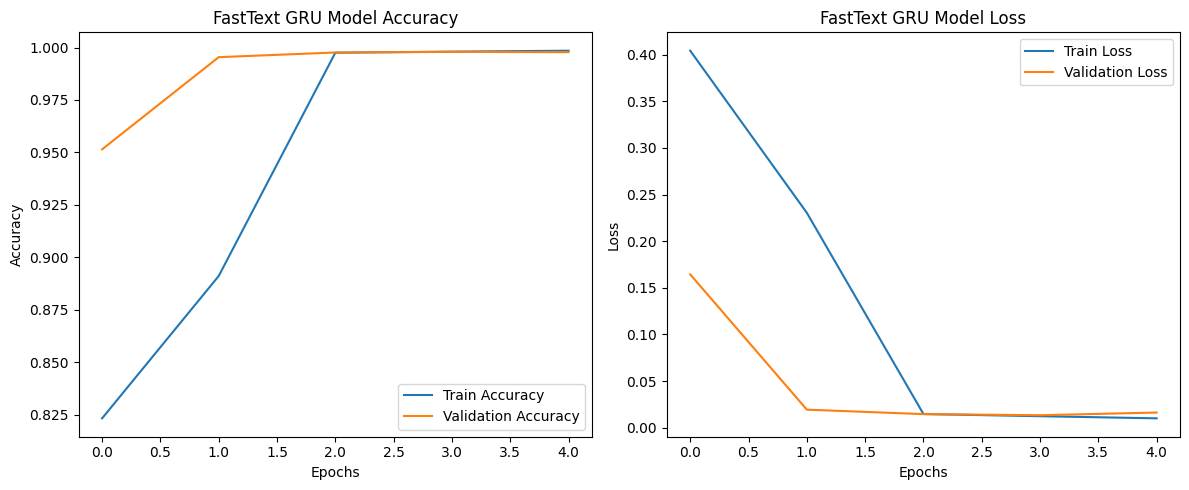

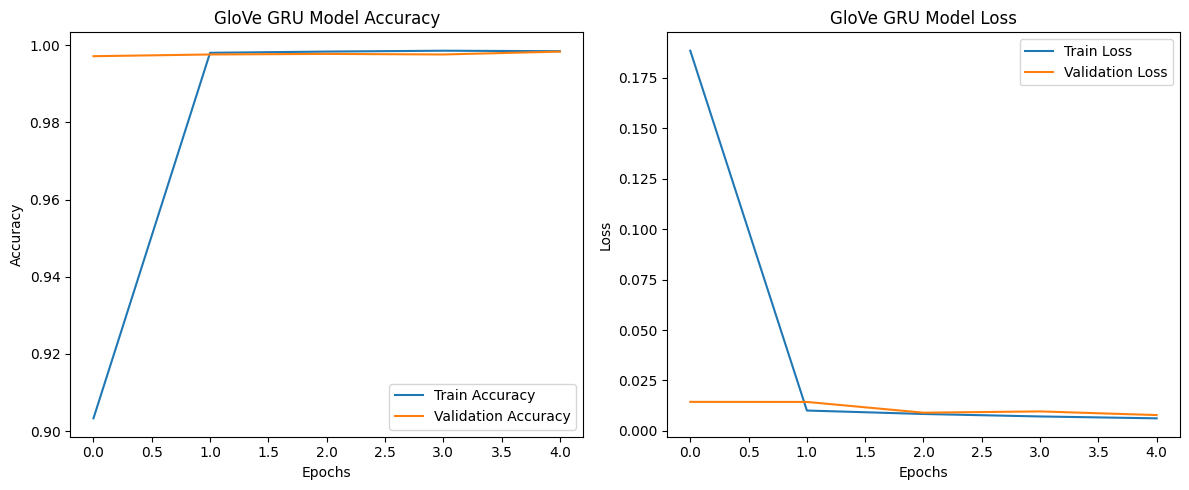

In [82]:
# Plotting training/validation accuracy and loss for GRU
import matplotlib.pyplot as plt

for name, result in gru_results.items():
    history = result["history"]
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} GRU Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} GRU Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Bi-LSTM (Bidirectional LSTM)

In [84]:
from keras.layers import Bidirectional, LSTM

# Step 3.1: Define a model with Bi-LSTM to evaluate embeddings
def create_bilstm_model(embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        trainable=False))
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(100)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [85]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)             │ (None, 100, 100)            │      22,744,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_12 (GRU)                         │ (None, 100, 100)            │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,108,205 (88.15 MB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 22,744,300 (86.76 MB)

 Optimizer params: 242,604 (947.68 KB)

In [86]:
# Evaluate Pretrained Embeddings with Bi-LSTM
pretrained_bilstm_models = {
    "Word2Vec": create_bilstm_model(word2vec_matrix),
    "FastText": create_bilstm_model(fasttext_matrix),
    "GloVe": create_bilstm_model(glove_matrix)
}

In [87]:
# Training and evaluation
bilstm_results = {}
for name, model in pretrained_bilstm_models.items():
    print(f"Training Bi-LSTM model with {name} embeddings...")
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"{name} Pretrained Bi-LSTM Model - Loss: {loss}, Accuracy: {accuracy}")
    bilstm_results[name] = {
        "history": history,
        "loss": loss,
        "accuracy": accuracy
    }

Training Bi-LSTM model with Word2Vec embeddings...
Epoch 1/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.9459 - loss: 0.1267 - val_accuracy: 0.9963 - val_loss: 0.0174
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9976 - loss: 0.0129 - val_accuracy: 0.9976 - val_loss: 0.0127
Epoch 3/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9982 - loss: 0.0098 - val_accuracy: 0.9978 - val_loss: 0.0135
Epoch 4/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9982 - loss: 0.0078 - val_accuracy: 0.9979 - val_loss: 0.0127
Epoch 5/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9571 - loss: 0.1020 - val_accuracy: 0.9972 - val_loss: 0.0142
Epoch 2/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9975 - loss: 0.0134 - val_accuracy: 0.9976 - val_loss: 0.0112
Epoch 3/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9979 - loss: 0.0097 - val_accuracy: 0.9976 - val_loss: 0.0140
Epoch 4/5
983/983 ━━━━━━━━━━━━━━━━━━━━ 21s 21m

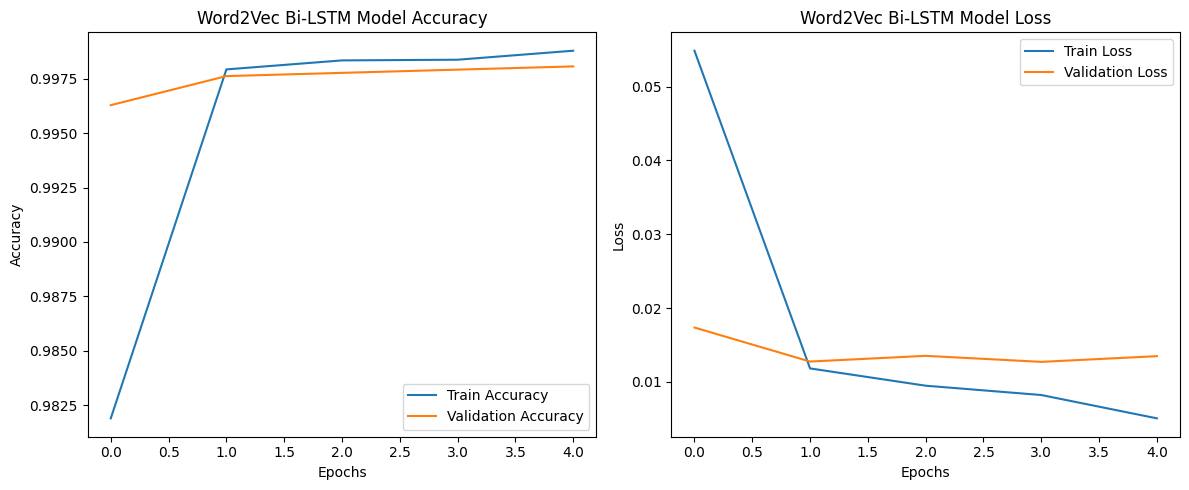

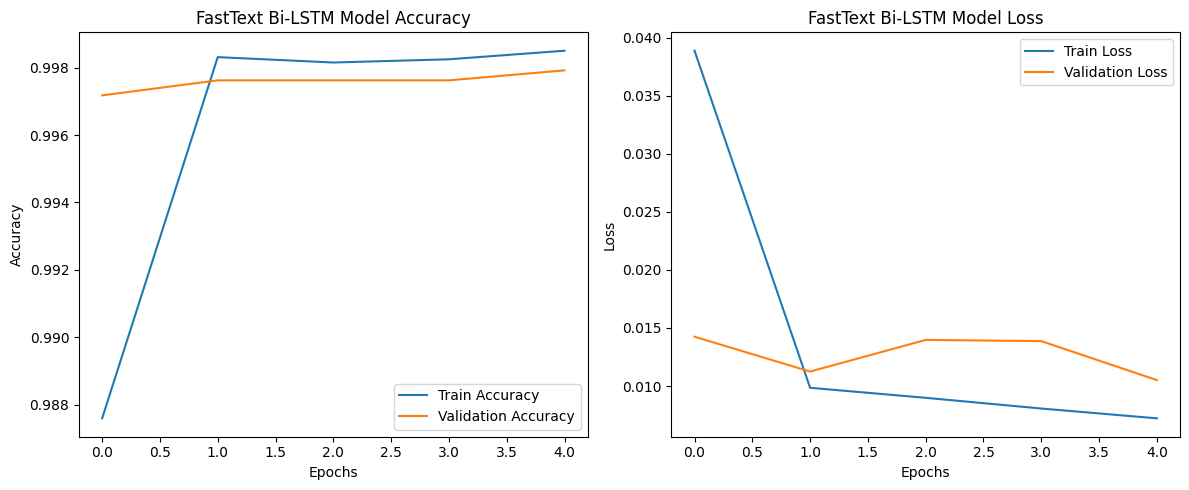

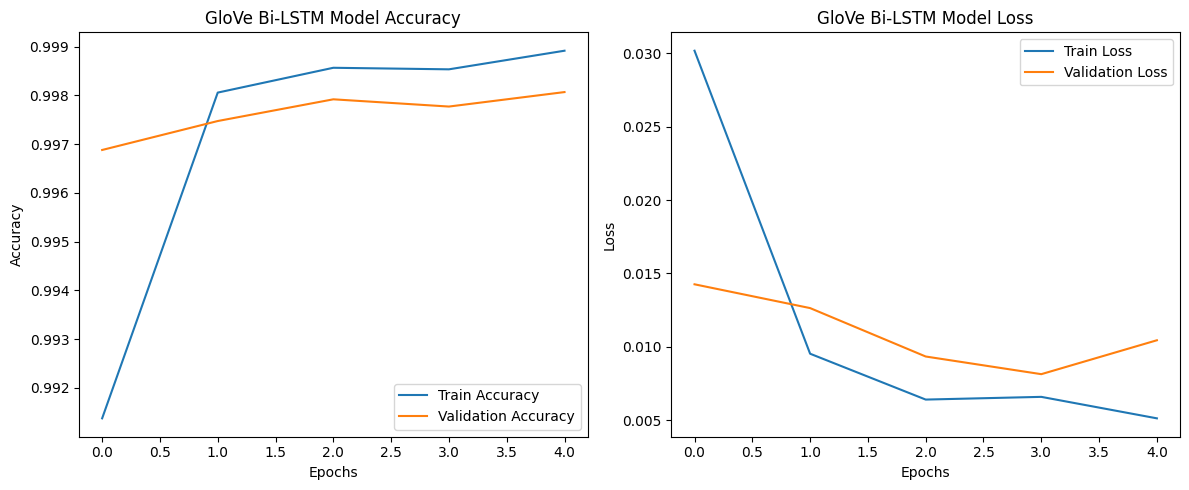

In [ ]:
# Plotting training/validation accuracy and loss for Bi-LSTM
import matplotlib.pyplot as plt

for name, result in bilstm_results.items():
    history = result["history"]
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Bi-LSTM Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} Bi-LSTM Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()